In [1]:
import numpy as np
import matplotlib.pyplot as plt
from potentials import d_poly__d_x

In [2]:
def const_pot(x):
    return d_poly__d_x(x, t=0)

In [3]:
dt = 0.01
time_horizon = 10
num_steps = int(time_horizon/dt)
t = np.linspace(0, time_horizon, num_steps)

x = np.empty(shape=t.shape[0])
x[0] = 0

x_one = x.copy()
x_one[0] = 1

x_neg = x.copy()
x_neg[0] = -1

Q = 10

for i in range(len(x) - 1):
    x[i+1] = x[i] + dt*(-const_pot(x[i]) - Q*np.sin((2*np.pi*t[i])/(time_horizon)))
    x_one[i+1] = x_one[i] + dt*(-const_pot(x_one[i]) - Q*np.sin((2*np.pi*t[i])/(time_horizon)))
    x_neg[i+1] = x_neg[i] + dt*(-const_pot(x_neg[i]) - Q*np.sin((2*np.pi*t[i])/(time_horizon)))

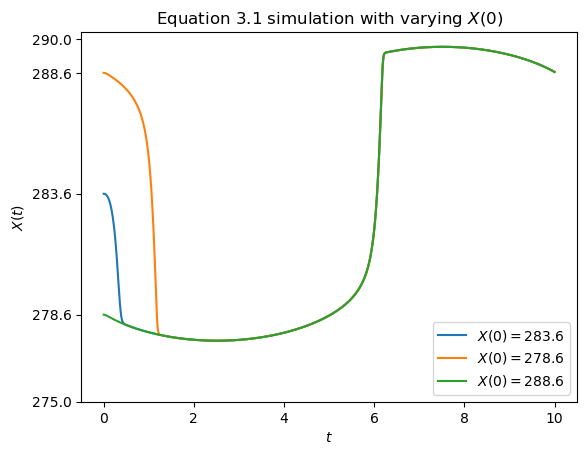

In [4]:
x_scaled = (x*5) + 283.6
plt.plot(t, x_scaled, label=r'$X(0) = 283.6$')
plt.plot(t, (x_one * 5) + 283.6, label=r'$X(0) = 278.6$')
plt.plot(t, (x_neg * 5) + 283.6, label=r'$X(0) = 288.6$')
plt.yticks([275, 278.6, 283.6, 288.6, 290])
plt.xlabel(r'$t$')
plt.ylabel(r'$X(t)$')
plt.title('Equation 3.1 simulation with varying $X(0)$')
plt.legend()
plt.savefig('eq3non_noise.svg', transparent=True)
plt.show()

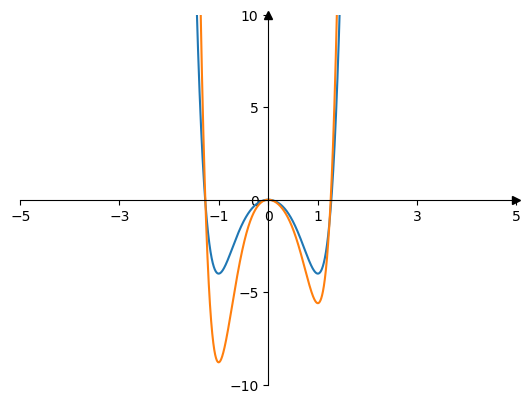

In [5]:
def int_pot(x, a_6=1, a_2=-3.2, a_3=0):
    a_5 = (-3/5)*a_3
    a_4 = (-3*a_6 - a_2)/2
    all_scale = 2

    return all_scale * (a_6 * x**6 + a_5 * x**5 + a_4 * x**4 + a_3 * x**3 + a_2 * x**2)

x = np.linspace(-1.5, 1.5, 10000)
plt.figure()
plt.plot(x, int_pot(x, a_6=2, a_2 = -2))
plt.plot(x, int_pot(x, a_6=4, a_2 = -3.2, a_3=2))

plt.xlim((-5,5))
plt.ylim((-10, 10))
plt.xticks([-5,-3,-1,0,1,3,5])
plt.yticks([-10, -5, 0, 5, 10])
# Set the spines (the lines that frame the plot)
ax = plt.gca()  # Get current axes
ax.spines['left'].set_position('zero')    # Move left spine to x=0
ax.spines['bottom'].set_position('zero')  # Move bottom spine to y=0
ax.spines['right'].set_visible(False)     # Hide right spine 
ax.spines['top'].set_visible(False)       # Hide top spine

# Add arrows to the axes
ax.plot((1), (0), '>k', transform=ax.get_yaxis_transform(), clip_on=False)  # X-axis arrow
ax.plot((0), (1), '^k', transform=ax.get_xaxis_transform(), clip_on=False)  # Y-axis arrow

plt.show()

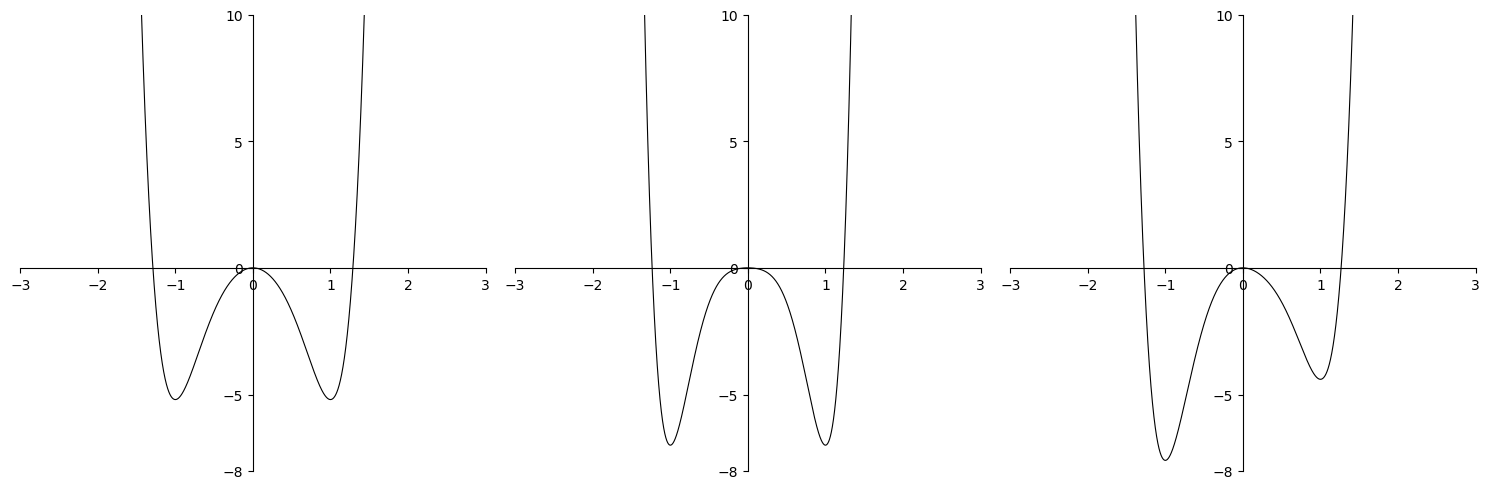

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def int_pot(x, a_6=1, a_2=-3.2, a_3=0):
    a_5 = (-3/5)*a_3
    a_4 = (-3*a_6 - a_2)/2
    all_scale = 2
    return all_scale * (a_6 * x**6 + a_5 * x**5 + a_4 * x**4 + a_3 * x**3 + a_2 * x**2)

x = np.linspace(-1.5, 1.5, 10000)

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# First subplot
ax1.plot(x, int_pot(x, a_6=2, a_2=-3.2), 'k-', linewidth=0.8)
# ax1.set_title(r'$U(x)$ with $a_6 = 2$ and $a_2 = -3.2$', pad=20)

# Second subplot
ax2.plot(x, int_pot(x, a_6=6, a_2=-1), 'k-', linewidth=0.8)
# ax2.set_title(r'$U(x)$ with $a_6 = 6$ and $a_2 = -1$', pad=20)

# Third subplot
ax3.plot(x, int_pot(x, a_6=3, a_2=-3, a_3=2), 'k-', linewidth=0.8)
# ax3.set_title(r'$U(x)$ with $a_6 = 2$ and $a_2 = -3.2$ and $a_3=2$', pad=20)

# Configure each subplot
for ax in [ax1, ax2, ax3]:
    ax.set_xlim(-3, 3)
    ax.set_ylim(-8, 10)
    ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
    ax.set_yticks([-8, -5, 0, 5, 10])
    
    # Set spines
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
plt.savefig('results/int_pot.svg', transparent=True)
plt.tight_layout()
plt.show()